## **Logistic Regression**

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.
Unlike linear regression which outputs contineous number values,logistic regression transforms its outputs using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

Logistic regression can be used for:
1. Binary Classification 
2. Multiclass Classification 
3. One-vs-Rest Classification 


##  **Assumptions of Logistic Regression**
1. The dependent variable must be categorical in nature 
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [26]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [27]:
# import the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# pre process the data
#remove the deck column 
# Check if 'deck' column exists before dropping
if 'deck' in df.columns:
    df.drop('deck', axis=1, inplace=True)

# Impute missing values in 'age' and 'fare'
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Impute missing values in 'embark_town' and 'embarked'
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = le.fit_transform(df[col])

df.head()







,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [35]:
# X and y columns 
X =df.drop('survived', axis=1)
y= df['survived']

In [36]:
# train test split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
# model call
model = LogisticRegression()

In [38]:
# train the model 
model.fit(X_train, y_train)

c:\PYTHON 3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# predict the values
y_pred = model.predict(X_test)

In [41]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('precision Score:', precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score 1.0
precision Score: 1.0
F1 Score 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        77

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

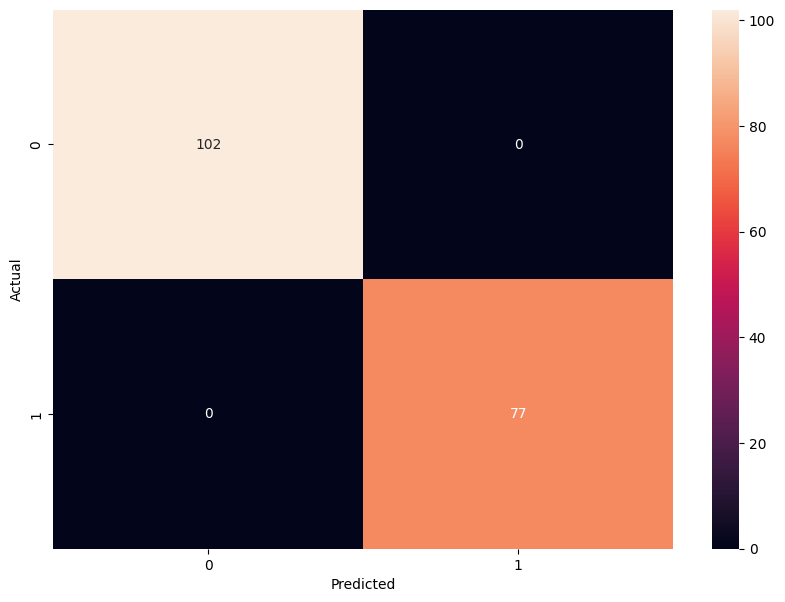

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# save the model
# pickle.dump(model, open('./saved_models'))